Based on https://www.kaggle.com/shereshevsky/a-modern-time-series-tutorial/notebook

In [45]:
import numpy as np
import pandas as pd


from matplotlib import pyplot as plt
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

myfavouritenumber = 42
seed = myfavouritenumber
np.random.seed(seed)

In [32]:
!pip install pmdarima

In [82]:
df = pd.read_csv("ADANIPORTS.csv", parse_dates=["Date"])
df.set_index("Date", drop=False, inplace=True)
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2007-11-27,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.00,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
2007-11-28,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.00,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2007-11-29,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.00,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
2007-11-30,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.00,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
2007-12-03,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.00,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741
2007-12-04,2007-12-04,MUNDRAPORT,EQ,969.30,985.00,1056.00,976.0,1049.00,1041.45,1015.39,4849250,4.923867e+14,NaN,1537667,0.3171
2007-12-05,2007-12-05,MUNDRAPORT,EQ,1041.45,1061.00,1099.50,1050.0,1084.00,1082.45,1082.79,2848209,3.084010e+14,NaN,904260,0.3175
2007-12-06,2007-12-06,MUNDRAPORT,EQ,1082.45,1089.00,1109.70,1051.0,1090.10,1081.30,1087.03,1749516,1.901771e+14,NaN,825691,0.4720
2007-12-07,2007-12-07,MUNDRAPORT,EQ,1081.30,1100.00,1134.00,1078.0,1100.00,1102.40,1106.57,2247904,2.487465e+14,NaN,697763,0.3104


In [83]:
df.index.is_monotonic, df.index.is_unique

(True, True)

In [84]:
df.shape

(3322, 15)

In [85]:
new_idx = pd.date_range("2008-05-26", "2021-04-30", freq="1D")

In [86]:
df = df.reindex(new_idx)

In [87]:
df.head(10)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2008-05-26,2008-05-26,MUNDRAPORT,EQ,853.65,848.45,905.4,829.00,902.00,887.45,868.68,1011808.0,8.789369e+13,NaN,324997.0,0.3212
2008-05-27,2008-05-27,MUNDRAPORT,EQ,887.45,909.90,926.0,860.40,864.00,873.05,889.71,1280280.0,1.139081e+14,NaN,225529.0,0.1762
2008-05-28,2008-05-28,MUNDRAPORT,EQ,873.05,873.00,883.0,835.00,840.10,841.00,859.20,617676.0,5.307081e+13,NaN,145633.0,0.2358
2008-05-29,2008-05-29,MUNDRAPORT,EQ,841.00,851.15,867.9,829.15,834.05,834.85,850.21,447906.0,3.808120e+13,NaN,72979.0,0.1629
2008-05-30,2008-05-30,MUNDRAPORT,EQ,834.85,843.10,847.7,760.00,788.00,790.40,794.59,851156.0,6.763166e+13,NaN,256211.0,0.3010
2008-05-31,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-06-02,2008-06-02,MUNDRAPORT,EQ,790.40,795.50,827.0,760.05,761.00,765.80,793.67,849170.0,6.739581e+13,NaN,109036.0,0.1284
2008-06-03,2008-06-03,MUNDRAPORT,EQ,765.80,741.00,769.9,733.35,740.30,739.40,746.50,532850.0,3.977750e+13,NaN,140129.0,0.2630
2008-06-04,2008-06-04,MUNDRAPORT,EQ,739.40,742.00,755.7,692.25,704.00,702.20,725.64,383088.0,2.779837e+13,NaN,64635.0,0.1687


In [88]:
df.shape

(4723, 15)

<AxesSubplot:xlabel='Date'>

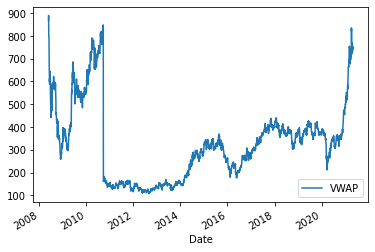

In [89]:
df.plot(x='Date',y='VWAP')

In [90]:
df.reset_index(drop=True, inplace=True)
lag_features = ["High", "Low", "Volume", "Turnover", "Trades"]
window1 = 3
window2 = 7
window3 = 30

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[lag_features].rolling(window=window3, min_periods=0)

df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index().astype(np.float32)
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index().astype(np.float32)

df_std_3d = df_rolled_3d.std().shift(1).reset_index().astype(np.float32)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)
df_std_30d = df_rolled_30d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]
    
    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("Date", drop=False, inplace=True)
df.head()

/var/folders/ff/w3p6wd3x1pqgfpfy48trmp5m0000gr/T/ipykernel_13584/3792767483.py:28: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.fillna(df.mean(), inplace=True)
/var/folders/ff/w3p6wd3x1pqgfpfy48trmp5m0000gr/T/ipykernel_13584/3792767483.py:28: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Turnover_mean_lag30,Turnover_std_lag3,Turnover_std_lag7,Turnover_std_lag30,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,MUNDRAPORT,EQ,853.65,848.45,905.4,829.00,902.00,887.45,868.68,...,1.026650e+14,4.090748e+13,4.908601e+13,6.329148e+13,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078
2008-05-27,2008-05-27,MUNDRAPORT,EQ,887.45,909.90,926.0,860.40,864.00,873.05,889.71,...,8.789370e+13,4.090748e+13,4.908601e+13,6.329148e+13,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078
2008-05-28,2008-05-28,MUNDRAPORT,EQ,873.05,873.00,883.0,835.00,840.10,841.00,859.20,...,1.009009e+14,1.839499e+13,1.839499e+13,1.839499e+13,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078
2008-05-29,2008-05-29,MUNDRAPORT,EQ,841.00,851.15,867.9,829.15,834.05,834.85,850.21,...,8.495755e+13,3.052475e+13,3.052475e+13,3.052475e+13,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078
2008-05-30,2008-05-30,MUNDRAPORT,EQ,834.85,843.10,847.7,760.00,788.00,790.40,794.59,...,7.323846e+13,4.015718e+13,3.421289e+13,3.421289e+13,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078


In [91]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["week"] = df.Date.dt.week
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

/var/folders/ff/w3p6wd3x1pqgfpfy48trmp5m0000gr/T/ipykernel_13584/2560288566.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["week"] = df.Date.dt.week


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,MUNDRAPORT,EQ,853.65,848.45,905.4,829.00,902.00,887.45,868.68,...,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078,5.0,22.0,26.0,0.0
2008-05-27,2008-05-27,MUNDRAPORT,EQ,887.45,909.90,926.0,860.40,864.00,873.05,889.71,...,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078,5.0,22.0,27.0,1.0
2008-05-28,2008-05-28,MUNDRAPORT,EQ,873.05,873.00,883.0,835.00,840.10,841.00,859.20,...,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078,5.0,22.0,28.0,2.0
2008-05-29,2008-05-29,MUNDRAPORT,EQ,841.00,851.15,867.9,829.15,834.05,834.85,850.21,...,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078,5.0,22.0,29.0,3.0
2008-05-30,2008-05-30,MUNDRAPORT,EQ,834.85,843.10,847.7,760.00,788.00,790.40,794.59,...,44560.917969,44972.476562,44000.214844,14112.541016,16726.320312,20866.830078,5.0,22.0,30.0,4.0


In [92]:
df_train = df[df.Date < "2019"]
df_valid = df[df.Date >= "2019"]

exogenous_features = ["High_mean_lag3", "High_std_lag3", "Low_mean_lag3", "Low_std_lag3",
                      "Volume_mean_lag3", "Volume_std_lag3", "Turnover_mean_lag3",
                      "Turnover_std_lag3", "Trades_mean_lag3", "Trades_std_lag3",
                      "High_mean_lag7", "High_std_lag7", "Low_mean_lag7", "Low_std_lag7",
                      "Volume_mean_lag7", "Volume_std_lag7", "Turnover_mean_lag7",
                      "Turnover_std_lag7", "Trades_mean_lag7", "Trades_std_lag7",
                      "High_mean_lag30", "High_std_lag30", "Low_mean_lag30", "Low_std_lag30",
                      "Volume_mean_lag30", "Volume_std_lag30", "Turnover_mean_lag30",
                      "Turnover_std_lag30", "Trades_mean_lag30", "Trades_std_lag30",
                      "month", "week", "day", "day_of_week"]

In [93]:
df_valid.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades_mean_lag3,Trades_mean_lag7,Trades_mean_lag30,Trades_std_lag3,Trades_std_lag7,Trades_std_lag30,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,
2019-01-01,2019-01-01,ADANIPORTS,EQ,387.70,386.30,390.90,384.05,390.60,389.00,386.49,...,28854.0,48753.250000,45353.750000,14112.541016,14614.833984,17475.412109,1.0,1.0,1.0,1.0
2019-01-02,2019-01-02,ADANIPORTS,EQ,389.00,388.00,388.95,378.00,381.00,381.30,383.82,...,20167.5,41298.800781,43740.761719,12284.566406,20929.384766,18567.630859,1.0,1.0,2.0,2.0
2019-01-03,2019-01-03,ADANIPORTS,EQ,381.30,382.40,385.30,376.60,376.95,378.10,380.35,...,19302.0,35329.800781,42234.332031,8814.905273,22910.697266,19368.105469,1.0,1.0,3.0,3.0
2019-01-04,2019-01-04,ADANIPORTS,EQ,378.10,378.65,383.95,375.85,383.50,382.15,380.40,...,22157.0,31531.199219,42700.808594,13563.499023,19920.835938,19114.910156,1.0,1.0,4.0,4.0
2019-01-07,2019-01-07,ADANIPORTS,EQ,382.15,385.00,386.95,379.35,379.75,381.65,382.81,...,32438.0,25552.599609,41621.632812,14112.541016,10733.537109,20100.650391,1.0,2.0,7.0,0.0


In [94]:
exogenous_features

['High_mean_lag3',
 'High_std_lag3',
 'Low_mean_lag3',
 'Low_std_lag3',
 'Volume_mean_lag3',
 'Volume_std_lag3',
 'Turnover_mean_lag3',
 'Turnover_std_lag3',
 'Trades_mean_lag3',
 'Trades_std_lag3',
 'High_mean_lag7',
 'High_std_lag7',
 'Low_mean_lag7',
 'Low_std_lag7',
 'Volume_mean_lag7',
 'Volume_std_lag7',
 'Turnover_mean_lag7',
 'Turnover_std_lag7',
 'Trades_mean_lag7',
 'Trades_std_lag7',
 'High_mean_lag30',
 'High_std_lag30',
 'Low_mean_lag30',
 'Low_std_lag30',
 'Volume_mean_lag30',
 'Volume_std_lag30',
 'Turnover_mean_lag30',
 'Turnover_std_lag30',
 'Trades_mean_lag30',
 'Trades_std_lag30',
 'month',
 'week',
 'day',
 'day_of_week']

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4723 entries, 2008-05-26 to 2021-04-30
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 3202 non-null   datetime64[ns]
 1   Symbol               3202 non-null   object        
 2   Series               3202 non-null   object        
 3   Prev Close           4723 non-null   float64       
 4   Open                 4723 non-null   float64       
 5   High                 4723 non-null   float64       
 6   Low                  4723 non-null   float64       
 7   Last                 4723 non-null   float64       
 8   Close                4723 non-null   float64       
 9   VWAP                 4723 non-null   float64       
 10  Volume               4723 non-null   float64       
 11  Turnover             4723 non-null   float64       
 12  Trades               4723 non-null   float64       
 13  Deliverable Vol

In [96]:
model = auto_arima(df_train.VWAP, exogenous=df_train[exogenous_features], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.VWAP, exogenous=df_train[exogenous_features])

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=23469.948, Time=2.16 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=23764.350, Time=1.66 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=23514.740, Time=1.74 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=23623.436, Time=1.88 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=41804.608, Time=1.64 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=23484.065, Time=2.19 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=24128.018, Time=2.57 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=23471.063, Time=2.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=23478.686, Time=2.62 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=23527.068, Time=1.92 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=23489.786, Time=2.47 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=23500.733, Time=2.47 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=23485.491, Time=2.55 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=23467.901, Time=2.35 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=23482.045, Time=2.98 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=24125.955, Time=2.17 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=23469.005, Time=2.59 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=23476.745, Time=2.40 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1
/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=23524.887, Time=1.98 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1890: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ar)**-1


 ARIMA(1,0,3)(0,0,0)[0]             : AIC=23487.842, Time=2.42 sec


/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1897: RuntimeWarning: divide by zero encountered in reciprocal
  return np.roots(self.polynomial_reduced_ma)**-1


 ARIMA(3,0,1)(0,0,0)[0]             : AIC=23498.663, Time=2.38 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=23483.539, Time=2.53 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 50.182 seconds


ARIMA(order=(2, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [97]:
forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid.loc[:,"Forecast_ARIMAX"] = forecast

/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
/Users/cteplovs/mambaforge/envs/models/lib/python3.9/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<AxesSubplot:xlabel='Date'>

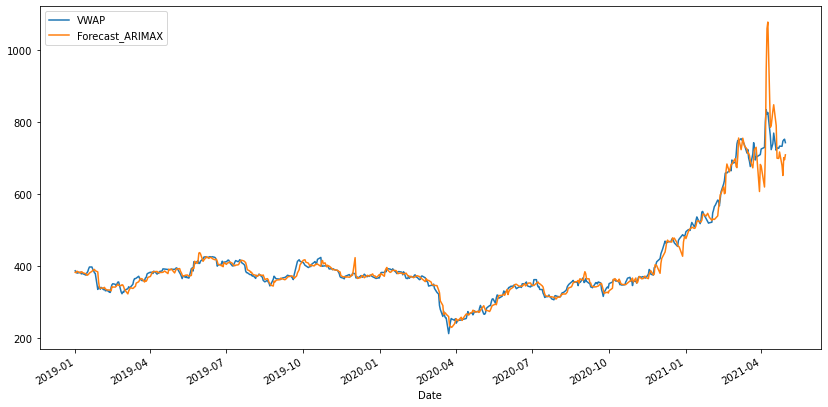

In [98]:
df_valid[["VWAP", "Forecast_ARIMAX"]].plot(figsize=(14, 7))

In [81]:
print("RMSE of Auto ARIMAX:", np.sqrt(mean_squared_error(df_valid.VWAP, df_valid.Forecast_ARIMAX)))
print("\nMAE of Auto ARIMAX:", mean_absolute_error(df_valid.VWAP, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX: 249.97791105465103

MAE of Auto ARIMAX: 171.03034913529495
